In [2]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [3]:
db = '/g/data/e14/rmh561/access-om2/archive/databases/cc_database_nostress.db'
session = cc.database.create_session(db)
expt = ['025deg_jra55_ryf_nostress_cont','025deg_jra55_ryf_nostress']
names = {'025deg_jra55_ryf_nostress_cont':'Control','025deg_jra55_ryf_nostress':'No Stress'}

In [3]:
cc.querying.get_variables(session, experiment='025deg_jra55_ryf_nostress_cont', frequency='1 monthly')

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
0,ANGLE,angle grid makes with latitude line on U grid,1 monthly,output009/ice/OUTPUT/iceh.1919-12.nc,240,1900-01-01 00:00:00,1920-01-01 00:00:00
1,ANGLET,angle grid makes with latitude line on T grid,1 monthly,output009/ice/OUTPUT/iceh.1919-12.nc,240,1900-01-01 00:00:00,1920-01-01 00:00:00
2,HTE,T cell width on East side,1 monthly,output009/ice/OUTPUT/iceh.1919-12.nc,240,1900-01-01 00:00:00,1920-01-01 00:00:00
3,HTN,T cell width on North side,1 monthly,output009/ice/OUTPUT/iceh.1919-12.nc,240,1900-01-01 00:00:00,1920-01-01 00:00:00
4,NCAT,category maximum thickness,1 monthly,output009/ice/OUTPUT/iceh.1919-12.nc,240,1900-01-01 00:00:00,1920-01-01 00:00:00
...,...,...,...,...,...,...,...
175,wt,dia-surface velocity T-points,1 monthly,output009/ocean/ocean-3d-wt-1-monthly-mean-ym_...,20,1900-01-01 00:00:00,1920-01-01 00:00:00
176,xt_ocean,tcell longitude,1 monthly,output009/ocean/ocean-2d-sfc_hflux_pme-1-month...,1112,1900-01-01 00:00:00,1920-01-01 00:00:00
177,xu_ocean,ucell longitude,1 monthly,output009/ocean/ocean-2d-tau_x-1-monthly-mean-...,278,1900-01-01 00:00:00,1920-01-01 00:00:00
178,yt_ocean,tcell latitude,1 monthly,output009/ocean/ocean-2d-sfc_hflux_pme-1-month...,1060,1900-01-01 00:00:00,1920-01-01 00:00:00


In [24]:
vars_025deg = cc.querying.get_variables(session, experiment=expt[0])
vars_025deg[vars_025deg['name'].str.lower().str.match('area')]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
275,area_t,tracer cell area,static,output002/ocean/ocean-2d-area_t.nc,10,1900-01-01 00:00:00,1900-01-01 00:00:00
276,area_u,velocity cell area,static,output003/ocean/ocean-2d-area_u.nc,10,1900-01-01 00:00:00,1900-01-01 00:00:00


In [6]:
start_time = '1910-01-01'
end_time = '1911-12-31'
u_con = cc.querying.getvar(expt[0],'u',session,frequency = '1 monthly',start_time='1910-01-01', ncfile ='ocean-3d-u-1-monthly-mean-ym_%.nc',
                       end_time='1911-12-31').sel(xu_ocean = slice(-90,10)).sel(yu_ocean = slice(10,65))
v_con = cc.querying.getvar(expt[0],'v',session,frequency = '1 monthly',start_time='1910-01-01', ncfile ='ocean-3d-v-1-monthly-mean-ym_%.nc',
                       end_time='1911-12-31').sel(xu_ocean = slice(-90,10)).sel(yu_ocean = slice(10,65))
u_buo = cc.querying.getvar(expt[1],'u',session,frequency = '1 monthly',start_time='1910-01-01', ncfile ='ocean-3d-u-1-monthly-mean-ym_%.nc',
                       end_time='1911-12-31').sel(xu_ocean = slice(-90,10)).sel(yu_ocean = slice(10,65))
v_buo = cc.querying.getvar(expt[1],'v',session,frequency = '1 monthly',start_time='1910-01-01', ncfile ='ocean-3d-v-1-monthly-mean-ym_%.nc',
                       end_time='1911-12-31').sel(xu_ocean = slice(-90,10)).sel(yu_ocean = slice(10,65))
u_con = u_con.sel(time = slice(start_time,end_time))
v_con = v_con.sel(time = slice(start_time,end_time))
u_buo = u_buo.sel(time = slice(start_time,end_time))
v_buo = v_buo.sel(time = slice(start_time,end_time))

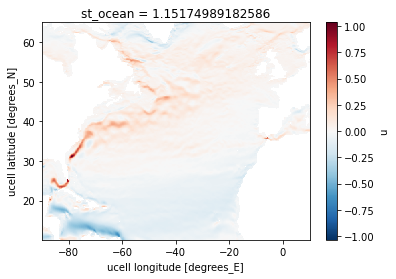

In [19]:
u_con.sel(st_ocean = 1,method = 'nearest').mean('time').plot()

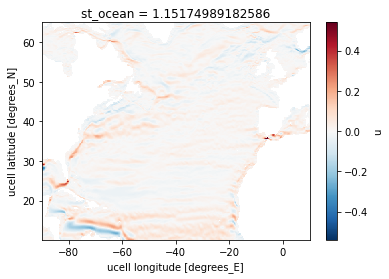

In [20]:
u_buo.sel(st_ocean = 1,method = 'nearest').mean('time').plot()

In [31]:
mld_con = cc.querying.getvar(exps[0],'mld',session,frequency = '1 monthly',start_time='1910-01-01',
                       end_time='1911-12-31')
mld_buo = cc.querying.getvar(exps[1],'mld',session,frequency = '1 monthly',start_time='1910-01-01',
                       end_time='1911-12-31')
mld_con = mld_con.sel(time = slice(start_time,end_time))
mld_buo = mld_buo.sel(time = slice(start_time,end_time))

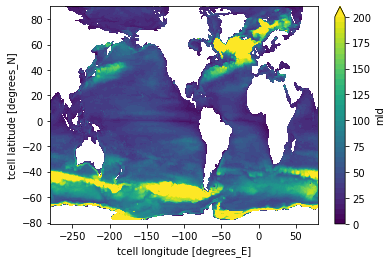

In [32]:
mld_con.mean('time').plot.contourf(levels = np.linspace(0,200,41))

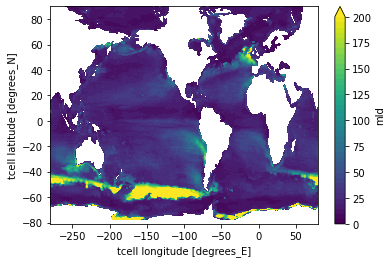

In [33]:
mld_buo.mean('time').plot.contourf(levels = np.linspace(0,200,41))

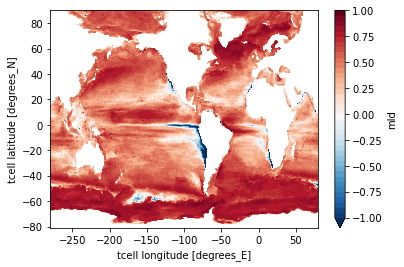

In [40]:
((mld_con - mld_buo)/mld_con).mean('time').plot.contourf(levels = np.linspace(-1,1,41))

## Weddell Gyre Analysis - Transport

In [11]:
tx_trans_int_z_con = cc.querying.getvar(expt[0],'tx_trans_int_z',session,start_time='1900-01-01', 
                       end_time='1920-12-31').sel(xu_ocean = slice(-80,40)).sel(yt_ocean = slice(-80,-55))
ty_trans_int_z_con = cc.querying.getvar(expt[0],'ty_trans_int_z',session,start_time='1900-01-01', 
                       end_time='1920-12-31').sel(xt_ocean = slice(-80,40)).sel(yu_ocean = slice(-80,-55))
tx_trans_int_z_buo = cc.querying.getvar(expt[1],'tx_trans_int_z',session,start_time='1900-01-01', 
                       end_time='1920-12-31').sel(xu_ocean = slice(-80,40)).sel(yt_ocean = slice(-80,-55))
ty_trans_int_z_buo = cc.querying.getvar(expt[1],'ty_trans_int_z',session,start_time='1900-01-01', 
                       end_time='1920-12-31').sel(xt_ocean = slice(-80,40)).sel(yu_ocean = slice(-80,-55))

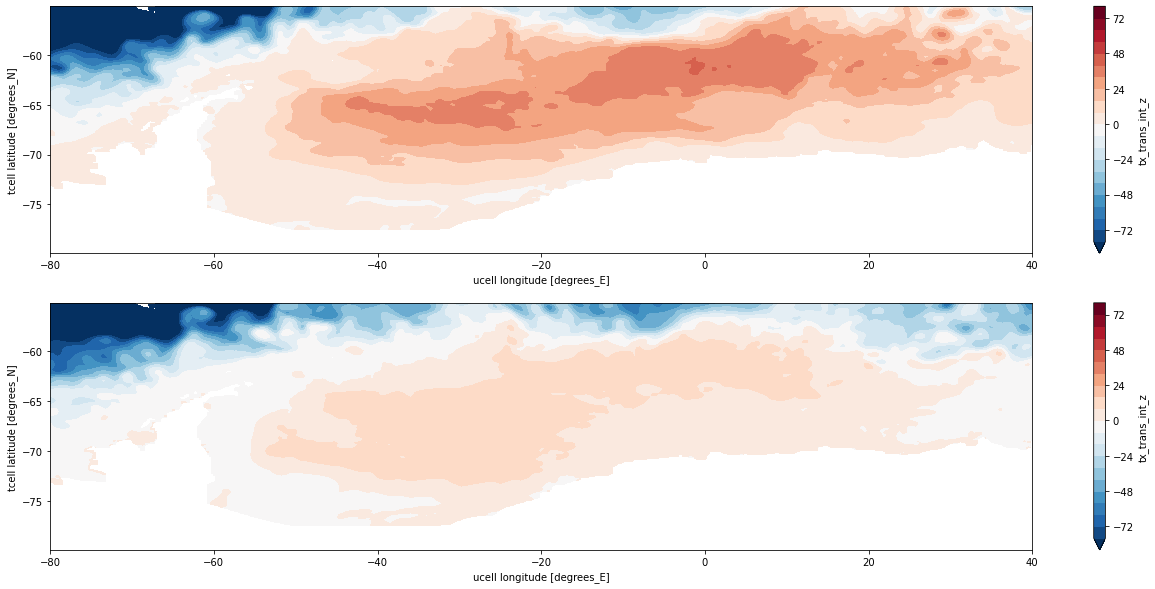

In [11]:
rho0=1035
psi_con = -tx_trans_int_z_con.cumsum('yt_ocean').where(abs(tx_trans_int_z_con<=1.e20))/(rho0*1.e6)
psi_buo = -tx_trans_int_z_buo.cumsum('yt_ocean').where(abs(tx_trans_int_z_buo<=1.e20))/(rho0*1.e6)

plt.figure(figsize=(22,10))

plt.subplot(211)
plt.title('Barotropic Streamfunction for Control Run')
psi_con.sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-80,80,21))

plt.subplot(212)
plt.title('Barotropic Streamfunction for No-Stress Run')
psi_buo.sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-80,80,21))
plt.show()

In [27]:
rho0 = 1035
psi_con_2 = -(ty_trans_int_z_con.cumsum('xt_ocean').where(abs(ty_trans_int_z_con<=1.e20))/(rho0*1.e6))*np.cos(ty_trans_int_z_con.yu_ocean*np.pi/180)

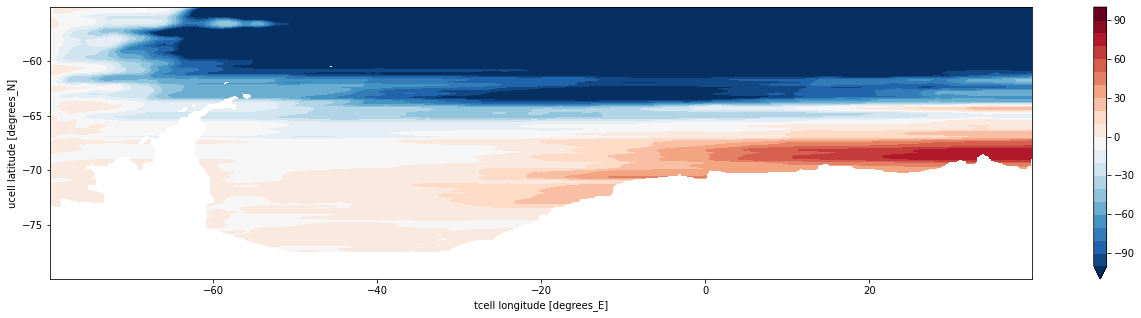

In [28]:
plt.figure(figsize=(22,5))
psi_con_2.sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-1e2,1e2,21))

In [38]:
tau_x = cc.querying.getvar(expt[0],'tau_x',session,start_time='1900-01-01', 
                       end_time='1920-12-31').sel(xu_ocean = slice(-80,40)).sel(yu_ocean = slice(-80,-55))
tau_y = cc.querying.getvar(expt[0],'tau_y',session,start_time='1900-01-01', 
                       end_time='1920-12-31').sel(xu_ocean = slice(-80,40)).sel(yu_ocean = slice(-80,-55))

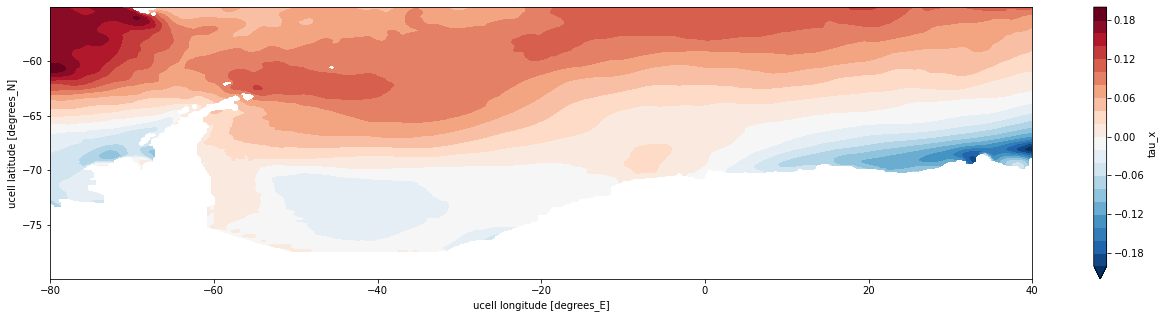

In [18]:
plt.figure(figsize=(22,5))
plt.title('Wind Stress for Control Run')
tau_x_con.sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-2e-1,2e-1,21))
plt.show()

In [32]:
Qnet_con = cc.querying.getvar(expt[0],'net_sfc_heating',session,).sel(
    xt_ocean = slice(-80,40)).sel(yt_ocean = slice(-80,-55)) + cc.querying.getvar(expt[0],'frazil_3d_int_z',session,frequency = '1 monthly').sel(
    xt_ocean = slice(-80,40)).sel(yt_ocean = slice(-80,-55))
Qnet_buo = cc.querying.getvar(expt[1],'net_sfc_heating',session,frequency = '1 monthly').sel(
    xt_ocean = slice(-80,40)).sel(yt_ocean = slice(-80,-55)) + cc.querying.getvar(expt[1],'frazil_3d_int_z',session,frequency = '1 monthly').sel(
    xt_ocean = slice(-80,40)).sel(yt_ocean = slice(-80,-55))

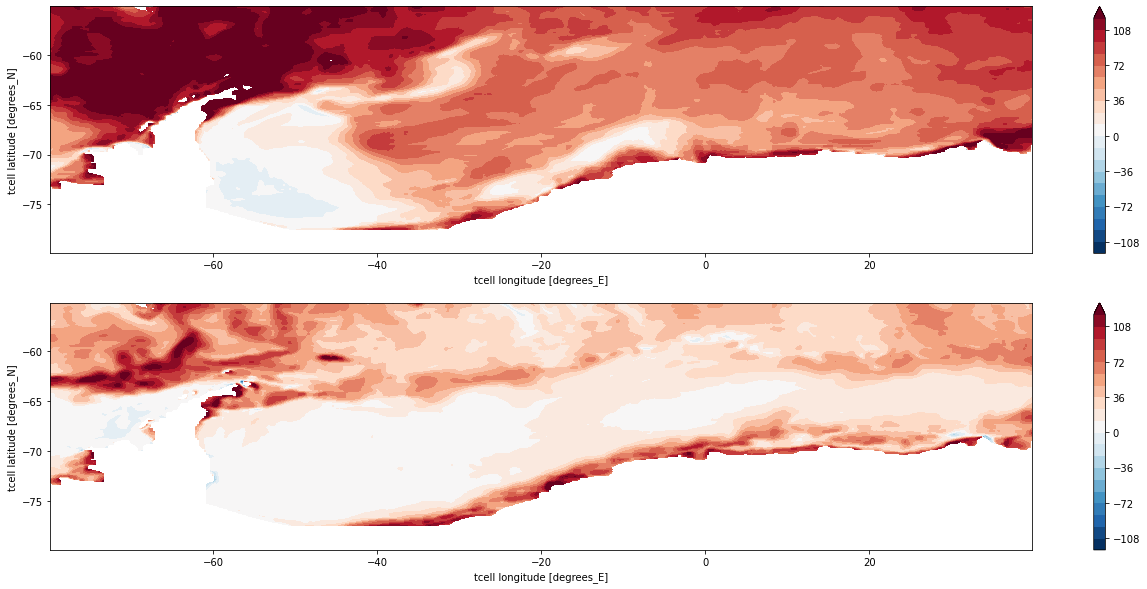

In [37]:
plt.figure(figsize=(22,10))

plt.subplot(211)
Qnet_con.sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-120,120,21))

plt.subplot(212)
Qnet_buo.sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-120,120,21))
plt.show()

In [9]:
r0 = 6.371 * 10**6
av = 7.2921159 * 10**(-5)
f = 2*av*np.sin((tau_x.yu_ocean*np.pi)/180)
beta = (2*av*np.cos((tau_x.yu_ocean*np.pi)/180))/r0
curl_tau = (1/(r0*np.cos((tau_x.yu_ocean*np.pi)/180)))*((-tau_x*np.cos(tau_x.yu_ocean*np.pi)/180).differentiate(
    'yu_ocean') - tau_y.differentiate('xu_ocean'))
V = (curl_tau/beta)*(0.12*r0)

NameError: name 'tau_x' is not defined

In [74]:
79.96821565 - 79.86261706

0.1055985899999996

In [75]:
55.21006898 - 55.06717121

0.1428977700000047

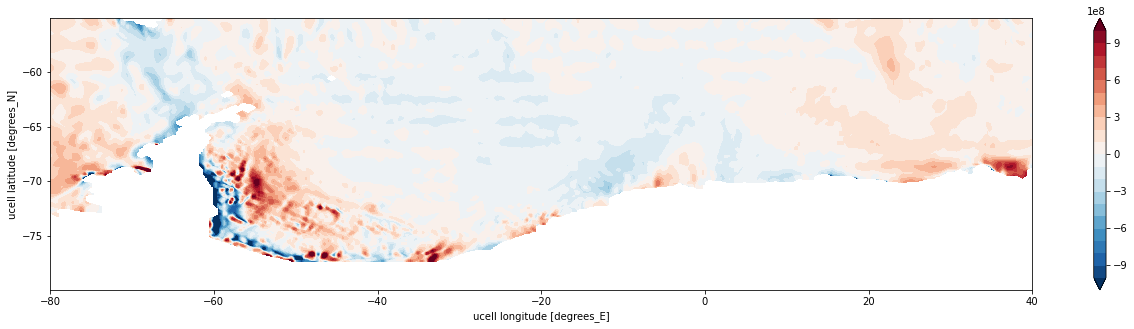

In [89]:
plt.figure(figsize=(22,5))
V.sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-1e9,1e9,21))
plt.show()

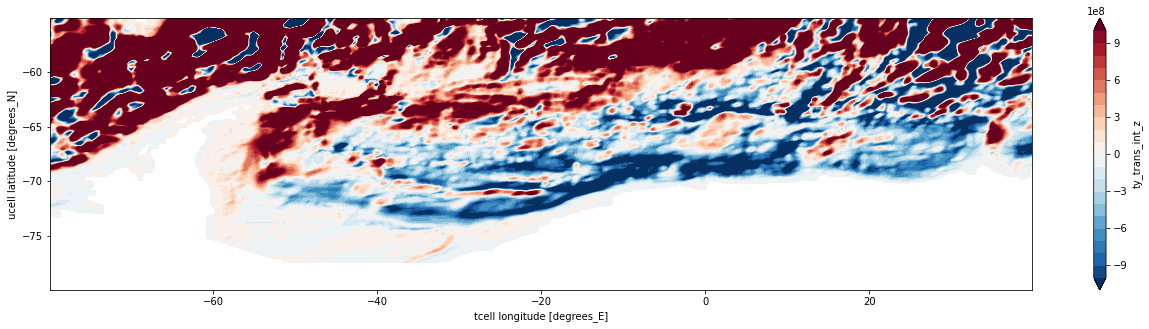

In [88]:
plt.figure(figsize=(22,5))
ty_trans_int_z_con.sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-1e9,1e9,21))
plt.show()

In [91]:
sub = ty_trans_int_z_con - V
plt.figure(figsize=(22,5))
sub.sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-1e9,1e9,21))
plt.show()

ValueError: DataArray must be 2d

<Figure size 1584x360 with 0 Axes>

## North Atlantic subtropical gyre - Transport

In [7]:
tau_x_NA = cc.querying.getvar(expt[0],'tau_x',session,start_time='1900-01-01', 
                       end_time='1920-12-31').sel(xu_ocean = slice(-90,10)).sel(yu_ocean = slice(10,65))
tau_y_NA = cc.querying.getvar(expt[0],'tau_y',session,start_time='1900-01-01', 
                       end_time='1920-12-31').sel(xu_ocean = slice(-90,10)).sel(yu_ocean = slice(10,65))

In [28]:
r0 = 6.371 * 10**6
av = 7.2921159 * 10**(-5)
f = 2*av*np.sin((tau_x_NA.yu_ocean*np.pi)/180)
beta = (2*av*np.cos((tau_x_NA.yu_ocean*np.pi)/180))/r0
curl_tau_NA = ((1/(r0*np.cos((tau_x_NA.yu_ocean*np.pi)/180)))*((-tau_x_NA*np.cos(tau_x_NA.yu_ocean*np.pi)/180).differentiate(
    'yu_ocean') - tau_y_NA.differentiate('xu_ocean')))*(180/np.pi)
V_NA = (curl_tau_NA/beta)*(0.12*r0*(np.pi/180))

In [16]:
ty_trans_int_z_NA_con = cc.querying.getvar(expt[0],'ty_trans_int_z',session,start_time='1900-01-01', 
                       end_time='1920-12-31').sel(xt_ocean = slice(-90,10)).sel(yu_ocean = slice(10,65))
ty_trans_int_z_NA_buo = cc.querying.getvar(expt[1],'ty_trans_int_z',session,start_time='1900-01-01', 
                       end_time='1920-12-31').sel(xt_ocean = slice(-90,10)).sel(yu_ocean = slice(10,65))

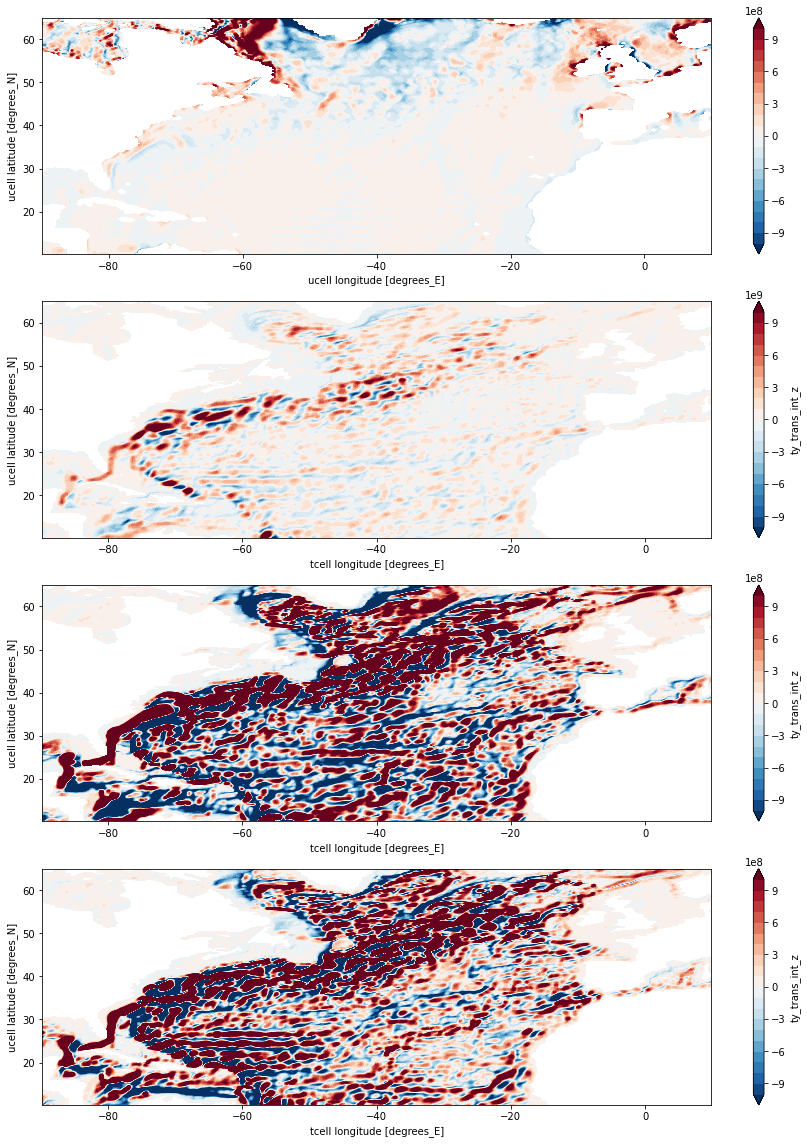

In [33]:
plt.figure(figsize=(15,20))
plt.subplot(411)
V_NA.sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-1e9,1e9,21))

plt.subplot(412)
(ty_trans_int_z_NA_con - ty_trans_int_z_NA_buo).sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-1e10,1e10,21))

plt.subplot(413)
ty_trans_int_z_NA_con.sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-1e9,1e9,21))

plt.subplot(414)
ty_trans_int_z_NA_buo.sel(time = slice('1905-01-01','1905-01-31')).mean('time').plot.contourf(levels = np.linspace(-1e9,1e9,21))

plt.show()

## Turbulence causes mixing of temperature - Weddell Sea

In [17]:
T_con = cc.querying.getvar(expt[0],'temp',session,start_time='1900-01-01', 
                       end_time='1920-12-31').sel(xt_ocean = slice(-80,40)).sel(yt_ocean = slice(-80,-55))
T_buo = cc.querying.getvar(expt[1],'temp',session,start_time='1900-01-01', 
                       end_time='1920-12-31').sel(xt_ocean = slice(-80,40)).sel(yt_ocean = slice(-80,-55))

In [20]:
T_1912_Jan_con = T_con.sel(time = slice('1912-01-01','1912-01-31')).mean('time').sel(st_ocean = 1000,method = 'nearest')
T_1912_Jan_buo = T_buo.sel(time = slice('1912-01-01','1912-01-31')).mean('time').sel(st_ocean = 1000,method = 'nearest')

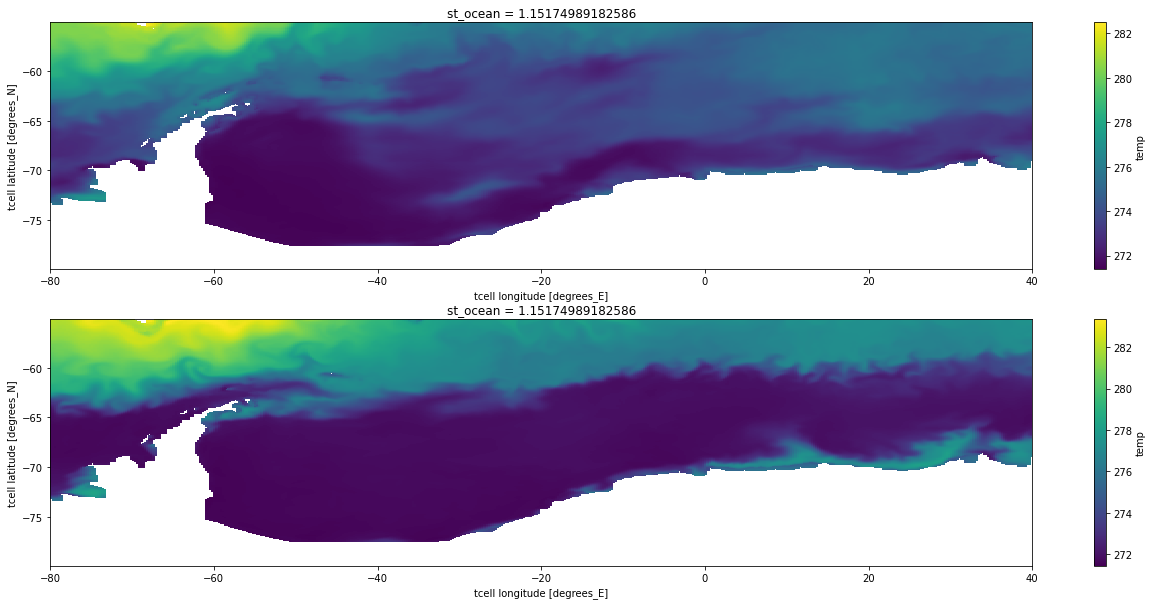

In [19]:
plt.figure(figsize=(22,10))

plt.subplot(211)
T_1912_Jan_con.plot()

plt.subplot(212)
T_1912_Jan_buo.plot()
plt.show()

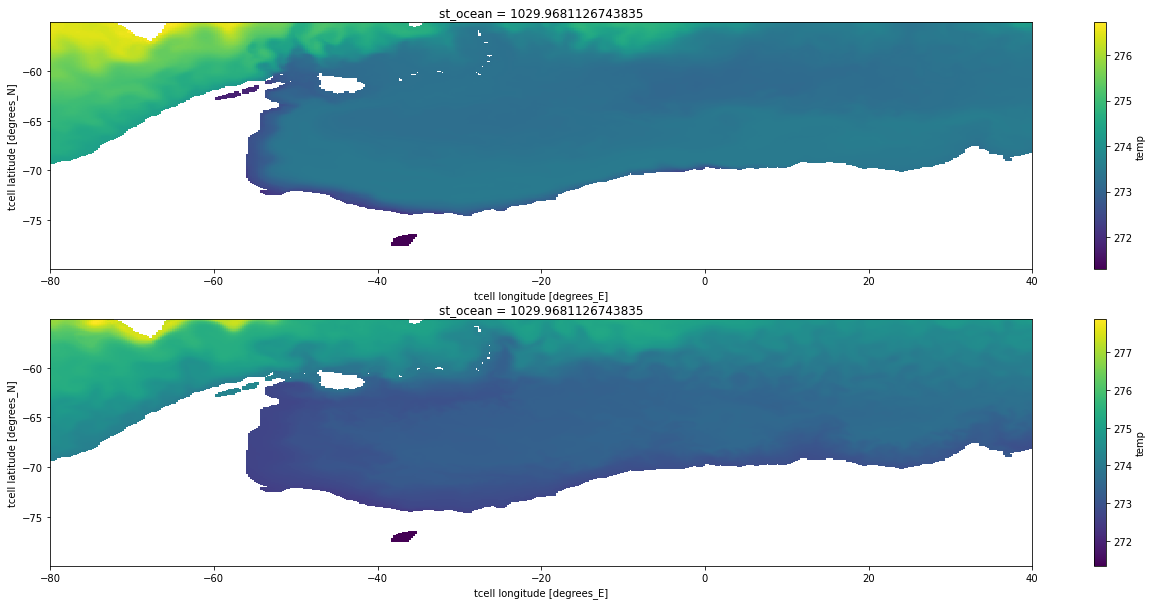

In [21]:
plt.figure(figsize=(22,10))

plt.subplot(211)
T_1912_Jan_con.plot()

plt.subplot(212)
T_1912_Jan_buo.plot()
plt.show()

In [22]:
T_mercator_con = cc.querying.getvar(expt[0],'temp',session,start_time='1910-01-01', 
                       end_time='1910-12-31').sel(yt_ocean = slice(-65,65)).mean('time')
T_mercator_buo = cc.querying.getvar(expt[1],'temp',session,start_time='1910-01-01', 
                       end_time='1910-12-31').sel(yt_ocean = slice(-65,65)).mean('time')

In [30]:
area_t = cc.querying.getvar(expt[0],'area_t',session).sel(yt_ocean = slice(-65,65))

ValueError: Could not find any dimension coordinates to use to order the datasets for concatenation

In [ ]:
a